In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Size             190 non-null    float64
 1   Location         200 non-null    object 
 2   Number of Rooms  190 non-null    float64
 3   Price            200 non-null    float64
dtypes: float64(3), object(1)
memory usage: 6.4+ KB
Training set size: (160, 4)
Testing set size: (40, 4)
RMSE:287079.64
R2: 0.08


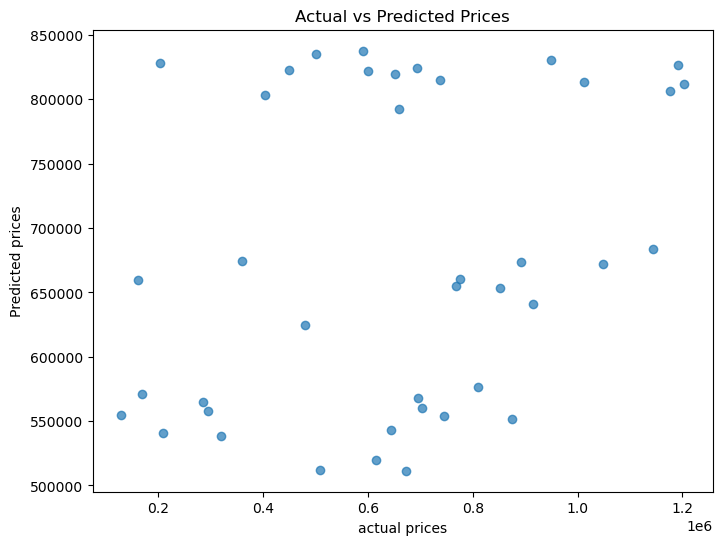

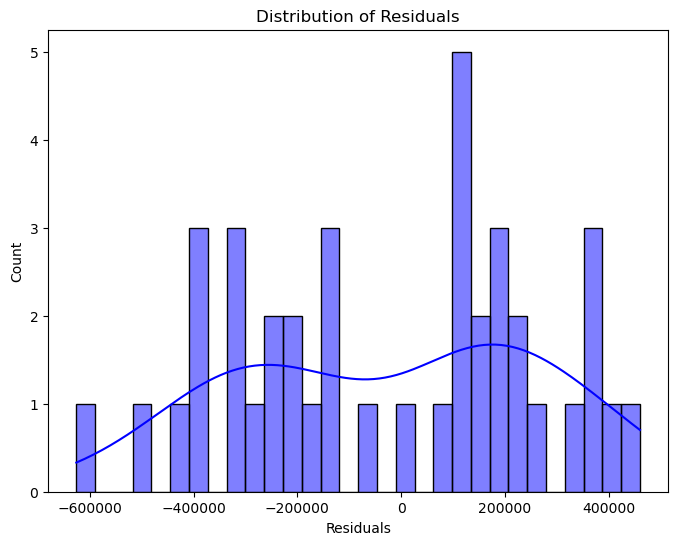

In [3]:
# Loading The Dataset
data = pd.read_csv("house_prices.csv")

# First 5 rows
data.head()

# dataset Info
data.info()

# Check for missing Values
data.isnull().sum()

#filling missing values 
data['Size'].fillna(data['Size'].median(), inplace=True)
data['Number of Rooms'].fillna(data['Number of Rooms'].median(),inplace=True)

# Handling Outliers
upper_limit = data['Price'].quantile(0.95)
data['Price'] = np.where(data['Price'] > upper_limit, upper_limit, data['Price'])

#Encoding The "location" with one-hot encoding
data = pd.get_dummies(data, columns=['Location'], drop_first=True)
#Displaying first 5 rows
data.head()

from sklearn.preprocessing import MinMaxScaler

# Normalizing
scaler = MinMaxScaler()
data[['Size','Number of Rooms']] = scaler.fit_transform(data[['Size','Number of Rooms']])

# Define Features and target variable
X = data.drop('Price', axis=1)
y = data['Price']

#Split dataset into traing and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f'Testing set size: {X_test.shape}')

# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)

#Display coefficients
model.coef_
model.intercept_

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
rmse =np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test, y_pred)

print(f'RMSE:{rmse:.2f}')
print(f'R2: {r2:.2f}')

# Scatter plot of actual vs predicted prices
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.title('Actual vs Predicted Prices')
plt.xlabel('actual prices')
plt.ylabel('Predicted prices')
plt.show()


# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True, bins=30, color='blue')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.show()